In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ROOT
import my_library.thesis_plotter_library as plotter
import my_library.common_analysis_tools as ct

Welcome to JupyROOT 6.24/04


In [3]:
ROOT.gStyle.SetOptStat(0)

This notebook is used for plotting things for my thesis. The cooresponding library defines all the functions used in this notebook.

In [4]:
hist_ks_nocut, hist_ks_cut = plotter.get_ks_before_after_cut()

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ks_nocut.png has been created


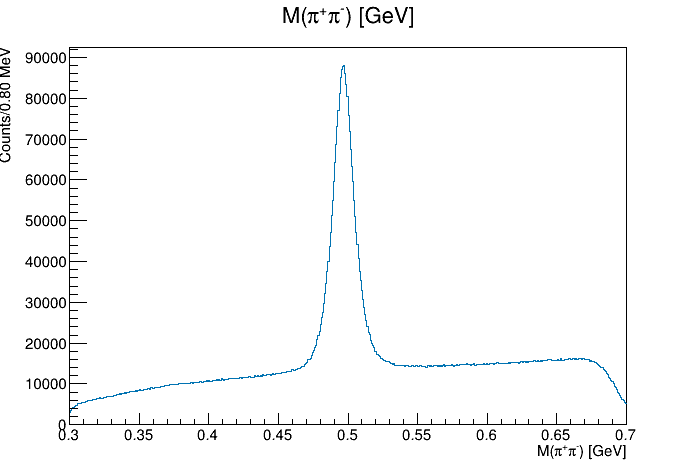

In [5]:
c = ROOT.TCanvas()
hist_ks_nocut.Draw()
c.Draw()
plotter.save_plot(c, 'ks_nocut')

In [6]:
hist_ks_pl = plotter.get_mpipi_vs_pathlength_sig()

input_line_145:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_146:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/pathlength_vs_mpipi.png has been created


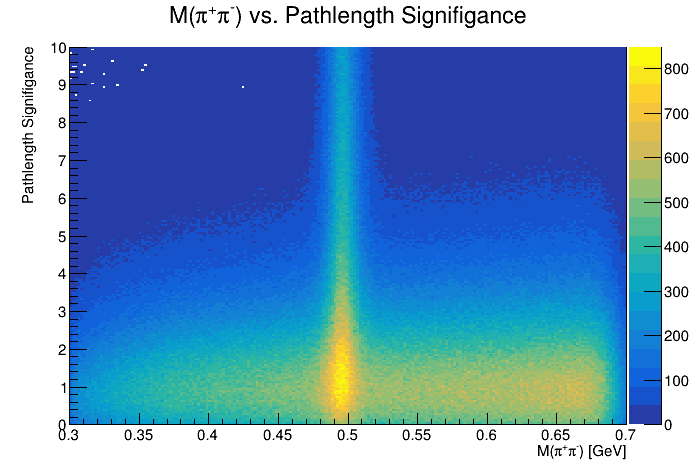

In [7]:
hist_ks_pl.Draw('colz')
c.Draw()
plotter.save_plot(c, 'pathlength_vs_mpipi')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ks_before_after_pl_cut.png has been created


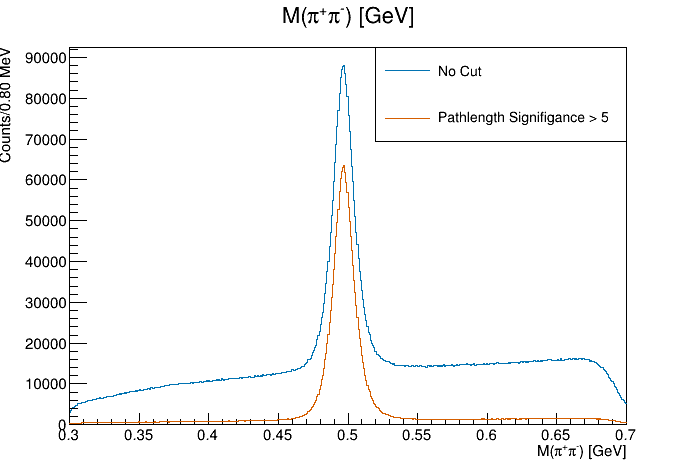

In [8]:
legend = plotter.build_legend([hist_ks_nocut, hist_ks_cut], x1 = 0.54, labels=['No Cut', 'Pathlength Signifigance > 5'])
hist_ks_nocut.Draw()
hist_ks_cut.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'ks_before_after_pl_cut')


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ks_after_pl_cut.png has been created


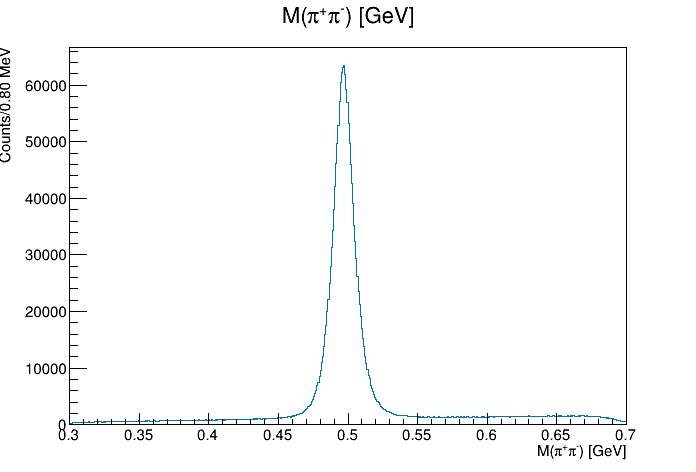

In [9]:
blue_hist_after = hist_ks_cut.Clone()
blue_hist_after.SetLineColor(ROOT.TColor.GetColor(ct.COLORBLIND_HEX_DICT['blue']))
blue_hist_after.Draw()
c.Draw()
plotter.save_plot(c, 'ks_after_pl_cut')

input_line_159:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_160:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/mx2_all_pipkmks.png has been created


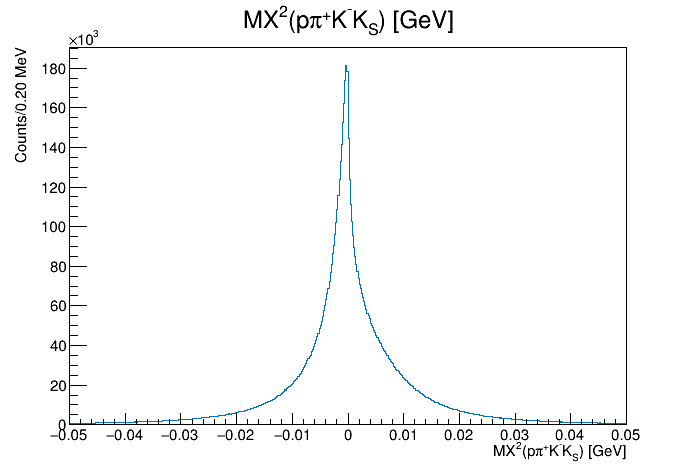

In [10]:
hist_mx2_all = plotter.plot_mx2_all()
hist_mx2_all.Draw()
c.Draw()
plotter.save_plot(c, 'mx2_all_pipkmks')

In [11]:
hist_tmand_before, hist_tmand_after = plotter.result_of_p_p_cut()

input_line_162:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_163:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^


building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/tmand_before_after_cut.png has been created


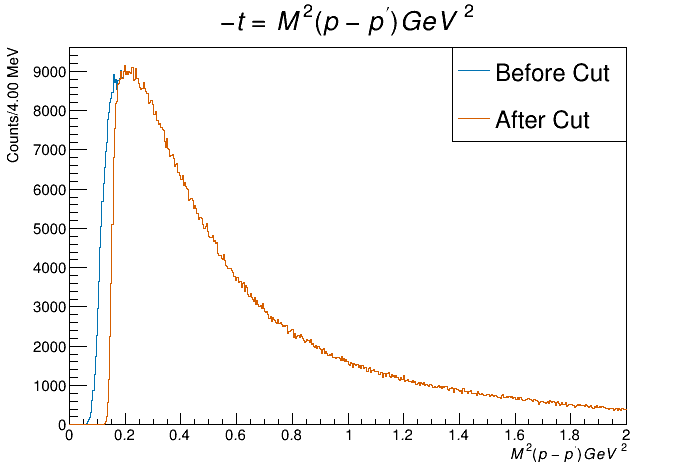

In [12]:
legend = plotter.build_legend([hist_tmand_before, hist_tmand_after], x1=0.65, labels=['Before Cut', 'After Cut'])
legend.SetTextSize(0.055)
hist_tmand_before.Draw()
hist_tmand_after.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'tmand_before_after_cut')

In [13]:
hist_delta, hist_nstar = plotter.plot_baryons()

input_line_170:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_171:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
input_line_173:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_174:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^


building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/delta_nstar.png has been created


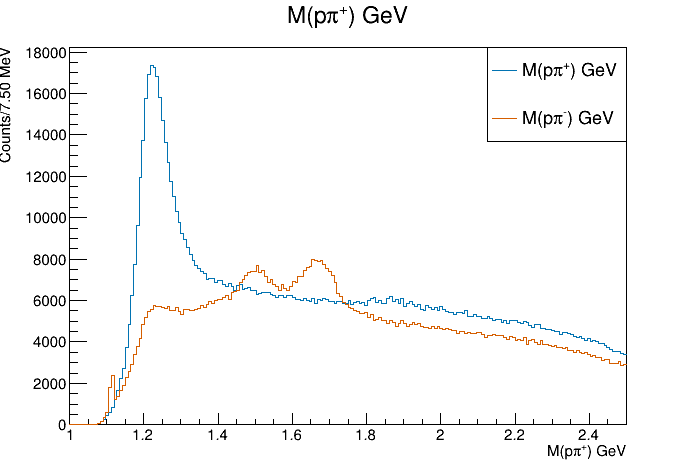

In [14]:
legend = plotter.build_legend([hist_delta, hist_nstar])
hist_delta.Draw()
hist_nstar.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'delta_nstar')

In [36]:
hist_kmp, hist_kpp, hist_ksp_pipkmks, hist_ksp_pimkpks = plotter.plot_lambdas()

input_line_224:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_225:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
input_line_227:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_228:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
input_line_230:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_2

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kmp.png has been created


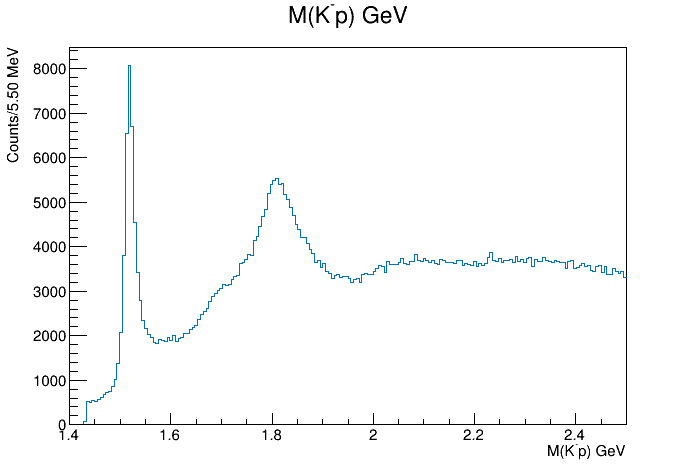

In [37]:
hist_kmp.Draw()
c.Draw()
plotter.save_plot(c, 'kmp')

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kpp.png has been created


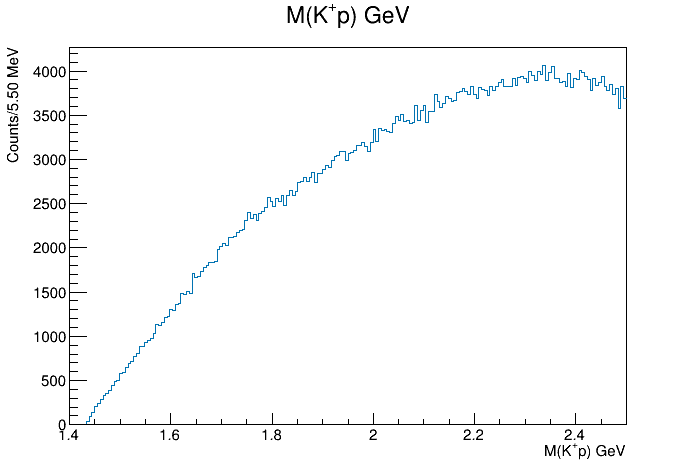

In [38]:
hist_kpp.Draw()
c.Draw()
plotter.save_plot(c, 'kpp')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kmp_kpp.png has been created


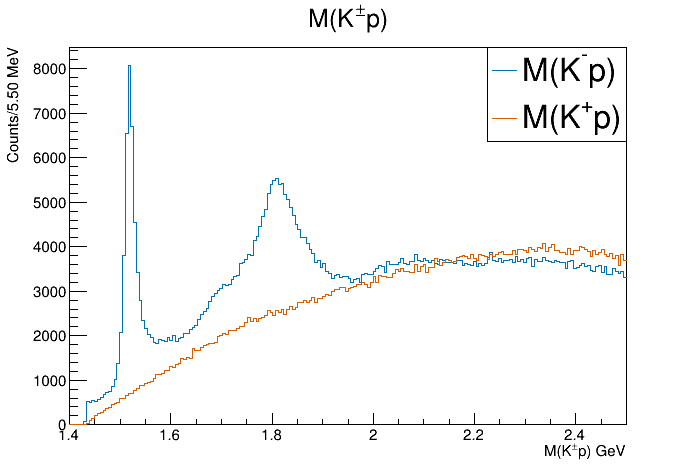

In [44]:
legend = plotter.build_legend([hist_kmp, hist_kpp], labels=['M(K^{-}p)', 'M(K^{+}p)'])
hist_kpp.SetLineColor(ROOT.TColor.GetColor(ct.COLORBLIND_HEX_DICT['red']))
hist_kmp.SetTitle('M(K^{#pm}p)')
hist_kmp.GetXaxis().SetTitle('M(K^{#pm}p) GeV')
hist_kmp.Draw()
hist_kpp.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'kmp_kpp')

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ksp_pipkmks.png has been created


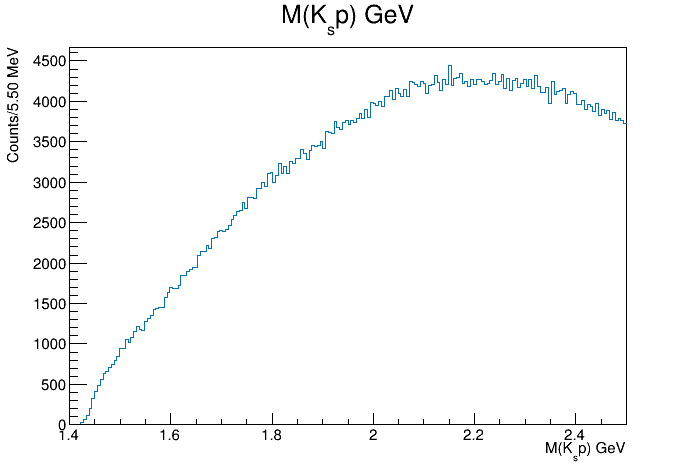

In [45]:
hist_ksp_pipkmks.Draw()
c.Draw()
plotter.save_plot(c, 'ksp_pipkmks')

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ksp_pimkpks.png has been created


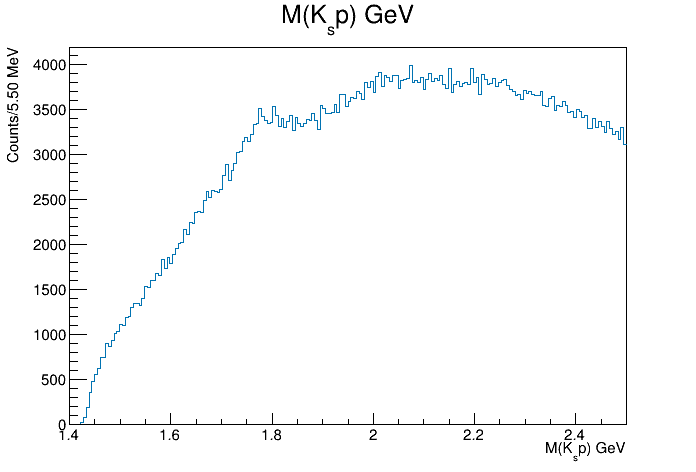

In [46]:
hist_ksp_pimkpks.Draw()
c.Draw()
plotter.save_plot(c, 'ksp_pimkpks')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/ksp_pipkmks_pimkpks.png has been created


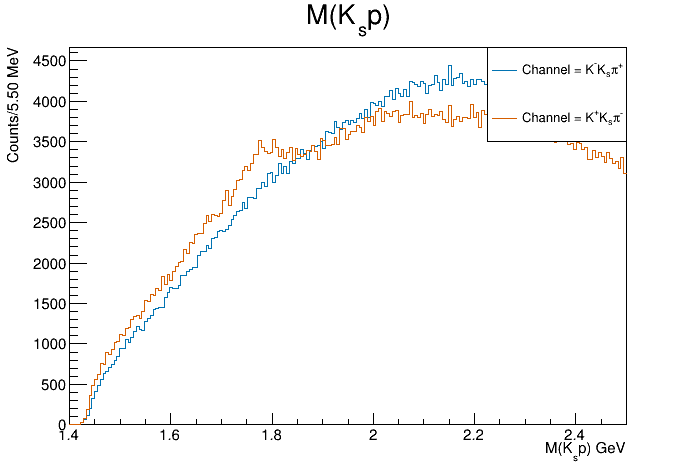

In [47]:
legend = plotter.build_legend([hist_ksp_pipkmks, hist_ksp_pimkpks], labels=['Channel = K^{-}K_{s}#pi^{+}', 'Channel = K^{+}K_{s}#pi^{-}'])
hist_ksp_pimkpks.SetLineColor(ROOT.TColor.GetColor(ct.COLORBLIND_HEX_DICT['red']))
hist_ksp_pipkmks.SetTitle('M(K_{s}p)')
hist_ksp_pipkmks.Draw()
hist_ksp_pimkpks.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'ksp_pipkmks_pimkpks')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/lambda_cuts.png has been created


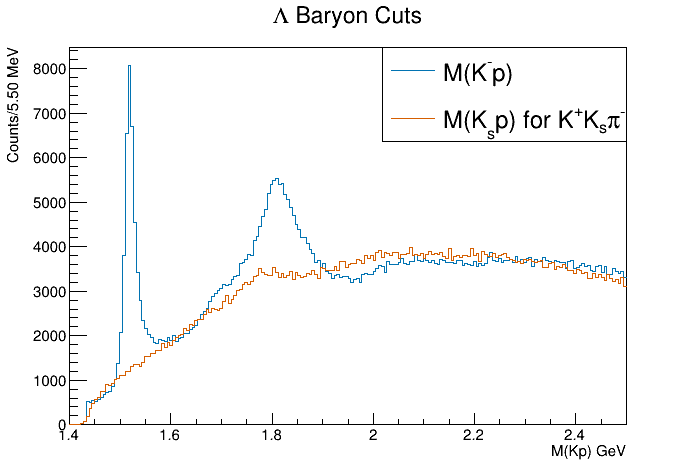

In [53]:
legend = plotter.build_legend([hist_kmp, hist_ksp_pimkpks], x1=0.55, labels=['M(K^{-}p)', 'M(K_{s}p) for K^{+}K_{s}#pi^{-}'])
hist_kmp.SetTitle('#Lambda Baryon Cuts')
hist_kmp.GetXaxis().SetTitle('M(Kp) GeV')
hist_kmp.Draw()
hist_ksp_pimkpks.Draw('same')
legend.Draw()
c.Draw()
plotter.save_plot(c, 'lambda_cuts')

In [59]:
hist_kstar_plus, hist_kstar_minus, hist_kstar_zero_pipkmks, hist_kstar_zero_pimkpks = plotter.plot_kstars()

input_line_260:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_261:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
input_line_263:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_264:2:5: error: redefinition of 'get_beam_bin_index'
int get_beam_bin_index(double e_beam) {
    ^
input_line_55:2:5: note: previous definition is here
int get_beam_bin_index(double e_beam) {
    ^
input_line_266:2:5: error: redefinition of 'get_t_bin_index'
int get_t_bin_index(double t) {
    ^
input_line_54:2:5: note: previous definition is here
int get_t_bin_index(double t) {
    ^
input_line_2

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kstar_plus.png has been created


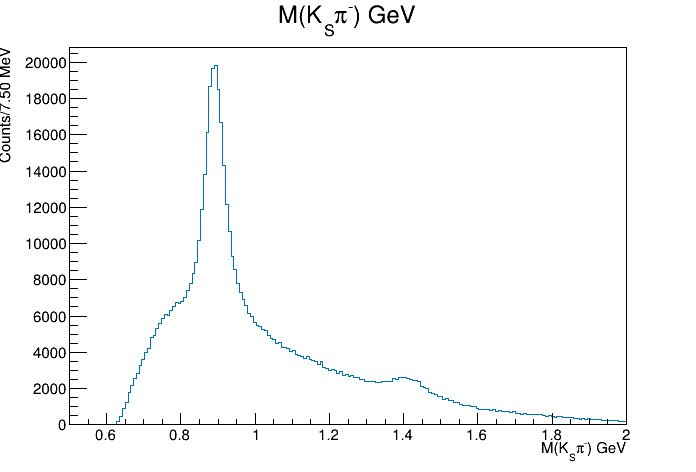

In [60]:
hist_kstar_plus.Draw()
c.Draw()
plotter.save_plot(c, 'kstar_plus')

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kstar_minus.png has been created


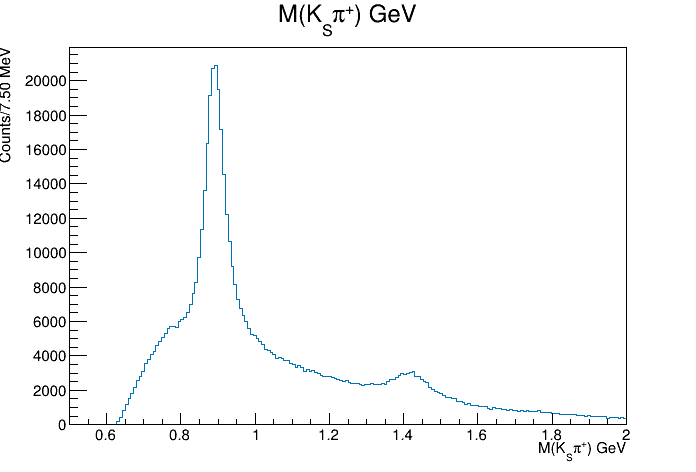

In [61]:
hist_kstar_minus.Draw()
c.Draw()
plotter.save_plot(c, 'kstar_minus')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/charged_kstars.png has been created


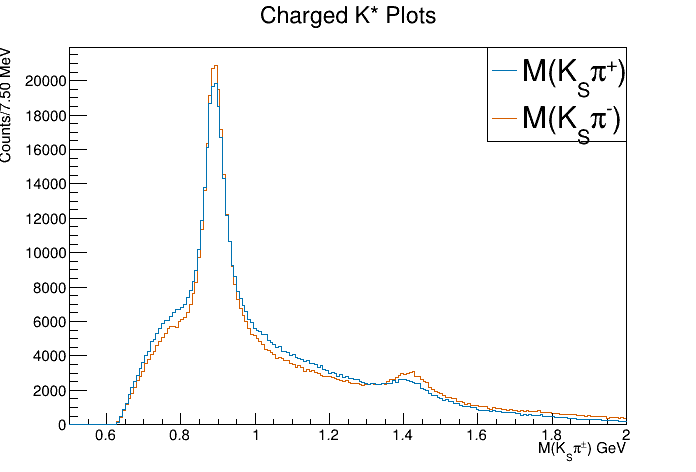

In [67]:
hist_kstar_minus.SetTitle("Charged K* Plots")
hist_kstar_minus.GetXaxis().SetTitle('M(K_{S}#pi^{#pm}) GeV')
hist_kstar_minus.SetLineColor(ROOT.TColor.GetColor(ct.COLORBLIND_HEX_DICT['red']))
hist_kstar_minus.Draw()
hist_kstar_plus.Draw('same')
legend = plotter.build_legend([hist_kstar_plus, hist_kstar_minus], labels=['M(K_{S}#pi^{+})', 'M(K_{S}#pi^{-})'])
legend.Draw()
c.Draw()
plotter.save_plot(c, 'charged_kstars')


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kstar_zero_pipkmks.png has been created


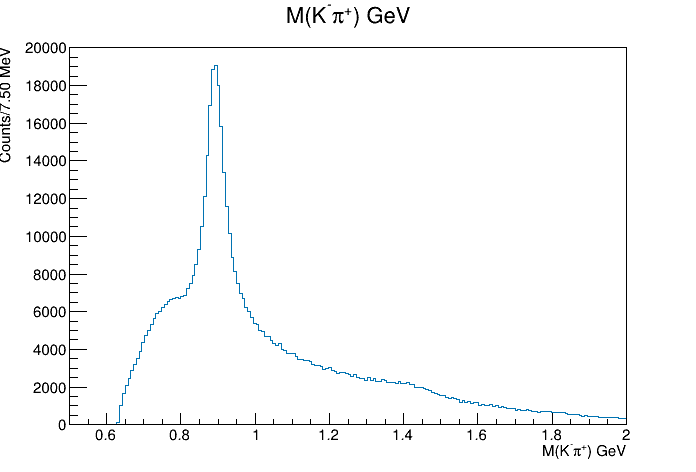

In [68]:
hist_kstar_zero_pipkmks.Draw()
c.Draw()
plotter.save_plot(c, 'kstar_zero_pipkmks')

Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/kstar_zero_pimkpks.png has been created


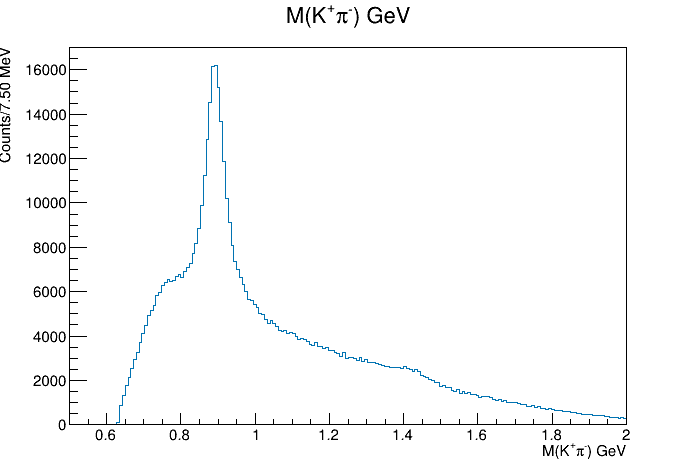

In [69]:
hist_kstar_zero_pimkpks.Draw()
c.Draw()
plotter.save_plot(c, 'kstar_zero_pimkpks')

building legend


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/thesis/neutral_kstars.png has been created


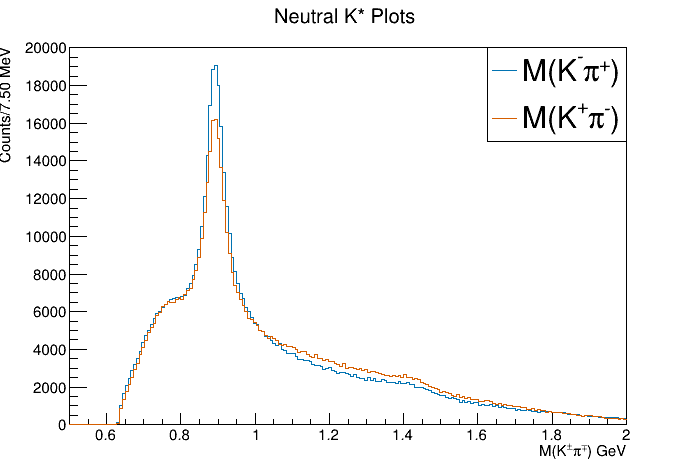

In [70]:
hist_kstar_zero_pipkmks.SetTitle("Neutral K* Plots")
hist_kstar_zero_pipkmks.GetXaxis().SetTitle('M(K^{#pm}#pi^{#mp}) GeV')
hist_kstar_zero_pimkpks.SetLineColor(ROOT.TColor.GetColor(ct.COLORBLIND_HEX_DICT['red']))
hist_kstar_zero_pipkmks.Draw()
hist_kstar_zero_pimkpks.Draw('same')
legend = plotter.build_legend([hist_kstar_zero_pipkmks, hist_kstar_zero_pimkpks], labels=['M(K^{-}#pi^{+})', 'M(K^{+}#pi^{-})'])
legend.Draw()
c.Draw()
plotter.save_plot(c, 'neutral_kstars')